In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
from icecream import icecream as ic
import time
from sklearn.preprocessing import normalize

In [164]:
imported_module = importlib.import_module("boid")
importlib.reload(imported_module)
from boid import Boid

In [166]:
def polarization(input_flock):
    """
    Caluclates the polarization of the flock, a measure of global ordering. It represents how aligned the velocities of the individual birds are. The higher the number, the more aligned the birds
    are. A nonzero value indicates that the center of mass of the flock is moving. Bigger is better/more accurate for flocks
    :param input_flock:
    :return:
    """
    normed_vel = normalize(input_flock.velocities, axis=0)
    sum_vel = np.sum(normed_vel, axis=1)

    sum_vel = sum_vel / input_flock.boid_count

    order = np.linalg.norm(sum_vel)

    return order

In [163]:
size = 5
flock = Boid(count=size)
sum = polarization(flock)
print(sum)

0.47629384733240276


#For checking conditions

In [167]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao

size = 200
flock = Boid(count=size)
num_cond = 30
num_steps = 500

metrics = []

for i in range(num_cond):
    flock.reset_flock()
    flock.run(num_steps)
    polar = polarization(flock)
    metrics.append(polar)

nump = np.array(metrics)
print(np.mean(nump))

KeyboardInterrupt: 

# Varying parameters

In [170]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao
start_time = time.time()

size = 200
flock = Boid(count=size, width=400, height=400)
num_cond = 5
num_steps = 750

centering = np.linspace(0.0005, 1, num=5)
separation = np.linspace(0.0, 2, num=10)
align = np.linspace(0.01, 1, num=10)
print(centering)

same_param = []
metrics = []
for param in centering:
    print(param)
    same_param = []
    for i in range(num_cond):
        flock.reset_param(centering=param, width=400, height=400)
        polar = flock.run(num_steps)
        same_param.append(polar)
    metrics.append(same_param)

print((time.time() - start_time) / 60)
# nump = np.array(metrics)
# print(np.mean(nump))
print(metrics)


[5.00000e-04 2.50375e-01 5.00250e-01 7.50125e-01 1.00000e+00]
0.0005
0.250375
0.50025
0.7501249999999999
1.0
4.886428252855937
[[0.9351355060884942, 0.9566150440846548, 0.9594582528108664, 0.945034878131866, 0.9588078692676392], [0.9795093620577703, 0.016103641531078294, 0.026950547007725634, 0.047822069794877214, 0.014670289637767103], [0.010077083016786746, 0.0142635665658789, 0.9422928904704514, 0.017682627614153856, 0.9596669399522313], [0.011743336942036019, 0.012431666171072744, 0.016330497624460653, 0.03891956724914706, 0.012577326342820341], [0.020694852003002025, 0.019352490210219925, 0.01999925841767079, 0.02074406257966172, 0.0366840110830925]]


# Display

In [160]:
print(metrics)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [171]:
print(np.mean(metrics, axis=1))

[0.95101031 0.21701118 0.38879662 0.01840048 0.02349493]


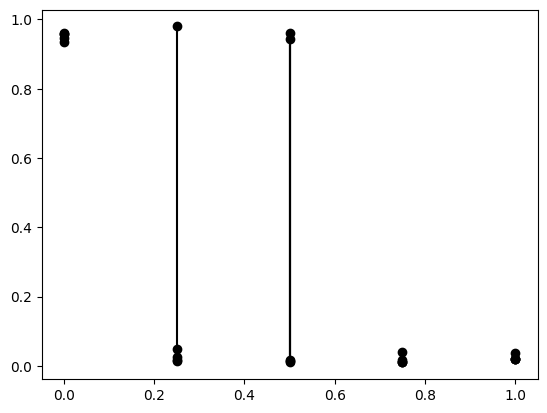

In [172]:
for i, param in enumerate(centering):
    plt.plot([param] * len(metrics[i]), metrics[i], marker='o', color='black')

plt.show()

In [151]:
# num_cond = 15
# num_steps = 1000
# centering = np.linspace(0.0005, 1, num=10)
store1 = [[0.8356974376838147, 0.503968266155396, 0.9841301947803289, 0.2864986850218101, 0.7533439517881934, 0.9004960459979511, 0.9509704824388112, 0.8365666234812579, 0.9578461268645895, 0.3503414299906628, 0.558975083732489, 0.7372077785453046, 0.8700964267572616, 0.944488026682326, 0.9920862499497192], [0.8561951084275244, 0.9999995449498694, 0.009143514133293841, 0.9999986546619052, 0.029107280828803515, 0.6418208947244635, 0.9136596556089716, 0.21830279219789647, 0.999826008396564, 0.9999594994607081, 0.012455881163139369, 0.9998239978847201, 0.8126776949079978, 0.9999699222012837, 0.9988997550698643], [0.07437722739334901, 0.02445459187267426, 0.032808457112769376, 0.9999982057603072, 0.01246323252073316, 0.0638369915467463, 0.04829561916077429, 0.9884595712748901, 0.030198716592049587, 0.043010217801224715, 0.019092431258764576, 0.03540542183722497, 0.7598099284759362, 0.763865831063674, 0.015453820931610757], [0.7627528176345677, 0.03653606334235405, 0.9999918159389583, 0.9934415871948334, 0.02869026302379362, 0.020957235843270375, 0.9996872306074193, 0.019153942041382894, 0.008908115870555714, 0.0625358217350883, 0.9991090171280786, 0.9862067203315208, 0.029017104972673773, 0.007486087770810464, 0.15329061387067572], [0.6299659190252032, 0.8003690551905708, 0.40792990979961796, 0.012975261391530324, 0.8432671099576015, 0.9805870890201849, 0.7386307949239911, 0.00883440366209614, 0.0116808117284517, 0.9860887609517379, 0.4852011987830664, 0.969526945897784, 0.5353600129572853, 0.19814952259219853, 0.7572414991917673], [0.02008857240059792, 0.025517435870599053, 0.021683862888429422, 0.8739164401913104, 0.011941759124796964, 0.026529787644681987, 0.025385343582262472, 0.023932159677076122, 0.051604336674399405, 0.018472135425852087, 0.02728937867945629, 0.48343883464544884, 0.016664527748646595, 0.0340515396941838, 0.9058906621988942], [0.008429706378983201, 0.00591770073755815, 0.006129622540751425, 0.03292710928131432, 0.9440577687936493, 0.013021893864747627, 0.03817343052425043, 0.011092511241013734, 0.02870419193511282, 0.026854198795626758, 0.022661933367640365, 0.0332509117394012, 0.8457337745602159, 0.009061006002485168, 0.02971763567472982], [0.9563066518141106, 0.01220839771608308, 0.04211484752296503, 0.01529996991682393, 0.006418828482882094, 0.01516450545451712, 0.020630707792177745, 0.024268973125445657, 0.028314877833029137, 0.00826835055423881, 0.026275560730852826, 0.017155064610840473, 0.0067374552826802575, 0.021143385610963912, 0.7791677664511016], [0.020623327872789136, 0.019735873885575884, 0.017093626027021254, 0.03253264588820823, 0.7899604129418867, 0.011078865218114624, 0.03140004367387652, 0.023992598610992552, 0.9651950216782643, 0.018943770268981572, 0.006658581945908568, 0.018185335610832087, 0.03193718378941024, 0.039816765726824695, 0.0047015347518070474], [0.028189779717173458, 0.01936536661224865, 0.012499725261524717, 0.013290854554007202, 0.02967881012528378, 0.005423596859952189, 0.03475588554822265, 0.013956690946670017, 0.02491590074659371, 0.015560865245611573, 0.01078512352621422, 0.048383352436565705, 0.03386295094877733, 0.014687903218730577, 0.005828723930697243]]

[[0.8356974376838147, 0.503968266155396, 0.9841301947803289, 0.2864986850218101, 0.7533439517881934, 0.9004960459979511, 0.9509704824388112, 0.8365666234812579, 0.9578461268645895, 0.3503414299906628, 0.558975083732489, 0.7372077785453046, 0.8700964267572616, 0.944488026682326, 0.9920862499497192], [0.8561951084275244, 0.9999995449498694, 0.009143514133293841, 0.9999986546619052, 0.029107280828803515, 0.6418208947244635, 0.9136596556089716, 0.21830279219789647, 0.999826008396564, 0.9999594994607081, 0.012455881163139369, 0.9998239978847201, 0.8126776949079978, 0.9999699222012837, 0.9988997550698643], [0.07437722739334901, 0.02445459187267426, 0.032808457112769376, 0.9999982057603072, 0.01246323252073316, 0.0638369915467463, 0.04829561916077429, 0.9884595712748901, 0.030198716592049587, 0.043010217801224715, 0.019092431258764576, 0.03540542183722497, 0.7598099284759362, 0.763865831063674, 0.015453820931610757], [0.7627528176345677, 0.03653606334235405, 0.9999918159389583, 0.993441587194

In [173]:
# size = 200
# flock = Boid(count=size, width=400, height=400)
# num_cond = 15
# num_steps = 750
# centering = np.linspace(0.0005, 1, num=20)

store2 = [[0.9782154735155456, 0.9776143104883741, 0.9739006929763913, 0.790617513117295, 0.9771570025387669, 0.9785419807425524, 0.9786498745758618, 0.9783335193084404, 0.9592582785446752, 0.9788870707773931, 0.9788558072459658, 0.9775906688018193, 0.9791193476817652, 0.9785772418479352, 0.9777560111634448], [0.9968072861157442, 0.13260709493516143, 0.9965002284902647, 0.9981709377725437, 0.13345992351711342, 0.07248986303606926, 0.9980768807260872, 0.9971280271319509, 0.9972858257504319, 0.14909474744326415, 0.9959266026553028, 0.1268491602469058, 0.997259092832915, 0.13158646433140267, 0.996209967751215], [0.043320447044000975, 0.9989950930963631, 0.06340159844232648, 0.02495135693522714, 0.9986766644011061, 0.06663177814555507, 0.04763746874186607, 0.06158697213409468, 0.9953778246373056, 0.017537615442921334, 0.9989728387747276, 0.10642404558519075, 0.999344653727968, 0.03911913702003227, 0.9991829459910092], [0.06712443229310205, 0.9993807795115407, 0.05747658127859463, 0.016739706389658337, 0.024258492654129563, 0.015943182110345552, 0.02779036836775739, 0.9993076771608906, 0.019215678472406586, 0.9995868138727585, 0.061345418268916305, 0.018020697839273746, 0.9993719881591876, 0.06768841030079674, 0.9986510644289669], [0.008009507651897462, 0.03364416173485159, 0.055525301398696235, 0.028571631436128887, 0.025100877062466727, 0.03721764602224237, 0.9998030170255079, 0.06704299789773957, 0.029308605268574418, 0.02219136229374084, 0.018819405494373827, 0.056447757556456674, 0.9997409782908031, 0.07919590938353087, 0.9996888486092561], [0.03467883175262341, 0.028314348855626482, 0.021332676500528676, 0.02128868971871349, 0.05204318808898233, 0.03755006386485907, 0.013571453194037568, 0.027986060204142217, 0.9996202084823306, 0.9996791351636432, 0.022058513376096132, 0.05081945241090317, 0.031031216510966523, 0.02410570164502893, 0.016388784241489044], [0.020632725542911817, 0.019142490830772588, 0.019099273034439965, 0.9997314054315525, 0.02108109330710132, 0.9933800885646406, 0.029118069381459145, 0.02883225806949535, 0.009942066686866318, 0.0264381114173253, 0.02798058668325516, 0.017398833899639105, 0.999731790131387, 0.022704947476037306, 0.03775162670259435], [0.02556152802032206, 0.02552389553653194, 0.025159201379840183, 0.026635953018364463, 0.9997996326812865, 0.02057506908216187, 0.03126902250935949, 0.01921157099726564, 0.03535424417468504, 0.03391052546574766, 0.017319884137895224, 0.014443527420113747, 0.9855531660054163, 0.01051986316845963, 0.014003379530237782], [0.02484028522219901, 0.014596137539402494, 0.03218793053781387, 0.9823823143907378, 0.0077913151823093075, 0.02168380135435362, 0.9656557726745832, 0.034325328670521724, 0.9822517080617361, 0.030959640977576943, 0.023935645670366365, 0.032902560500665014, 0.03732238129882857, 0.010534536338955075, 0.01576278207590352], [0.010349578535730515, 0.022411049399980034, 0.027292105434055053, 0.009744511521735262, 0.01421833254917744, 0.026549566302894227, 0.025689681286951628, 0.01731221043045396, 0.019594554750972264, 0.019858002180127034, 0.014936057076580227, 0.013129010348302874, 0.01637641438287724, 0.016089153684871065, 0.02162482901564024], [0.012597375419871078, 0.007256663297386997, 0.028925031433206187, 0.018857624140113594, 0.01742835651672083, 0.020449582772454965, 0.025817479285053634, 0.014807037874996093, 0.01563908858355404, 0.7108420375811133, 0.023656562428976097, 0.02035694322619697, 0.012213911798167144, 0.022481047974238527, 0.015681549719463138], [0.01994107161164091, 0.020880962226639276, 0.014213221889929508, 0.026591190946719093, 0.012583051489315392, 0.02441560464139051, 0.015536222809754228, 0.011228713191200114, 0.011381856188692458, 0.016285845944852752, 0.02239296718439451, 0.02196419810824668, 0.02703555817831968, 0.01872549318284206, 0.0183036103271639], [0.022373028422437803, 0.02457818744344035, 0.027374954824506102, 0.9496426675401015, 0.027614696334968877, 0.016318175711299968, 0.018925319621490896, 0.01813178746915964, 0.013934381260676055, 0.016465884884178446, 0.0197339572862645, 0.02175174282824266, 0.015318791913535613, 0.017418537562221895, 0.9710779286727487], [0.029614132307079755, 0.01830552605546225, 0.03979081117895919, 0.016219170328070867, 0.01837259679388406, 0.01899384093425587, 0.014836576938571835, 0.02169618427447796, 0.038113794886583736, 0.022787519441279765, 0.02452975452370469, 0.01630436620999769, 0.025540593264352828, 0.013821377351554419, 0.020809815105222083], [0.024558452980857938, 0.012880862609169198, 0.02342946373210104, 0.01839164419421765, 0.017105773882771232, 0.021391185026853877, 0.04578444315379162, 0.030571187327202983, 0.026783710177993292, 0.014668491620699647, 0.014077259277594248, 0.02178618604640624, 0.016299997176724427, 0.023636005582044844, 0.01686802975313331], [0.026846522601878316, 0.01943646090113588, 0.014974164326754847, 0.03443939565170497, 0.02913378306574225, 0.019083760679095965, 0.015266380735454142, 0.01388680164356192, 0.019763322173070235, 0.02363306398354911, 0.02816123744285566, 0.021660990788294567, 0.025611860762671402, 0.02308950275940893, 0.016301665676402313], [0.016639154610255603, 0.01674514174043603, 0.028022367854334488, 0.016164214239823328, 0.016927933408570132, 0.01658102732731934, 0.011784386356245126, 0.01170721667261876, 0.023449457155798673, 0.019589047564404435, 0.018094992533722293, 0.016190241362334302, 0.0218809602069443, 0.021459851931739698, 0.01728185660894271], [0.019132577176156698, 0.02004444471425627, 0.02290608367973003, 0.024996963835881226, 0.01614289362754792, 0.016170697882793135, 0.02655819004791111, 0.01665741701235902, 0.018071777640284364, 0.019545914699512182, 0.029356707231370797, 0.021993153606358954, 0.013694403336038925, 0.021036065336953604, 0.040230923785508764], [0.02582960290909784, 0.015736958362305653, 0.015242081279015716, 0.021598642052223574, 0.022150994881371525, 0.021114273289172432, 0.01462529133468694, 0.02199570097093466, 0.015430883378395283, 0.01898762743717127, 0.024516246829082853, 0.017235978971782084, 0.017339814802331245, 0.023075335936083147, 0.02571585718286516], [0.022744498854275895, 0.01892313391578652, 0.020670622511838724, 0.021170449182096884, 0.019711319774894386, 0.016158586812897585, 0.01869951610652209, 0.015829583150349536, 0.018367785644374288, 0.022718214966361637, 0.022941878611546607, 0.02420947072979542, 0.022210586942924087, 0.019659432921547634, 0.02426655688560223]]


In [ ]:
# size = 50
# flock = Boid(count=size, width=400, height=400)
# num_cond = 15
# num_steps = 1000
# centering = np.linspace(0.0005, 1, num=30)

test3 = [[0.9674722679465785, 0.9164037453148913, 0.9655874350602894, 0.9802225149694601, 0.9811577554733732, 0.8575298444393756, 0.8961476490913314, 0.981374334807732, 0.9677164623304995, 0.9436288104163906, 0.9151982998048765, 0.7738491585863525, 0.9686647844066938, 0.9501612897809457, 0.9839545544533922], [0.9982779308883551, 0.9997371854479592, 0.9988484288317224, 0.9992841206728963, 0.9994616823289981, 0.9993319409021223, 0.9983251313017374, 0.16034257222865073, 0.998940477063127, 0.17730348871644, 0.999383443370369, 0.9985430018903131, 0.9988525557896364, 0.9987905638785973, 0.9987459584351792], [0.9995801675119484, 0.9997606961024169, 0.07960821140290743, 0.9997030768505175, 0.999710854451424, 0.9995934963488192, 0.9997595201991035, 0.9997520469627063, 0.09445454484761086, 0.07943186461091602, 0.9997595523266236, 0.9994037411661254, 0.999599961053282, 0.9996475138947918, 0.09417784225596483], [0.9997572503548815, 0.9997471931863404, 0.9997140834433443, 0.9998093778469088, 0.9998562645476073, 0.9997589627730182, 0.7273591485701794, 0.9996938190469258, 0.06716059191978993, 0.04357141858442411, 0.9997839473650723, 0.9998716500778088, 0.05278281777579496, 0.9996444348384729, 0.9997513495994476], [0.9998060898441543, 0.9998921530209853, 0.9997517574020861, 0.21507731889829626, 0.9998475562501541, 0.022710216500527715, 0.9998139028812002, 0.9998071868377996, 0.9996862323441872, 0.9996810067344245, 0.9998571430607253, 0.0119940408133332, 0.022596933816078336, 0.9997091436328762, 0.9997223636100059], [0.9998369325208131, 0.9998377891871354, 0.9995561548355704, 0.9998807433792468, 0.9998383906029226, 0.5023819070802914, 0.9998727260765145, 0.9998628966799404, 0.9998131754179234, 0.9998751758604892, 0.9998449472424227, 0.9998278250953239, 0.9998398953991544, 0.016485340631673524, 0.9998789866185281], [0.9998762810611409, 0.999861369842228, 0.9999029155657457, 0.9998543527639402, 0.9998959787517964, 0.999888603177574, 0.01808880260923966, 0.9998864813702265, 0.9998605240478011, 0.031595220405637975, 0.06245990919891498, 0.9998700777377263, 0.9999091813250633, 0.9998689351211287, 0.005646105331423333], [0.027323147906043906, 0.9998677682877406, 0.030536973092632147, 0.9999128914384241, 0.9998899674506567, 0.9998684465150025, 0.013614890150767637, 0.011944402237413325, 0.009524049465544564, 0.9998496808847119, 0.015871742474884445, 0.007115495905030494, 0.03072021809450054, 0.01771760381172172, 0.9998639176095898], [0.9999379121330546, 0.9998666012905355, 0.9999172403348143, 0.03487602412696347, 0.06418912662556962, 0.9999005903808851, 0.03310835268687336, 0.02122119287674695, 0.03623853795514185, 0.999808007070481, 0.013951974078056519, 0.9998864764001882, 0.017274000997885567, 0.05315821118140224, 0.016479080698345992], [0.9999193622981103, 0.08454247868792382, 0.9998871728885294, 0.999909494151205, 0.051847640298560205, 0.9999343594566629, 0.012497312451339613, 0.9999096632579682, 0.999915380717212, 0.01224367195089107, 0.9999154143102703, 0.9999070846098808, 0.9998972226093854, 0.9999347312764064, 0.023253670142216958], [0.9999144918985511, 0.0621776062686083, 0.009943941679871074, 0.9999257963479095, 0.021311354117021675, 0.9999236815020643, 0.9999153775418205, 0.19705804578942918, 0.99991442357668, 0.01904143590122691, 0.9999300277099448, 0.9999297830291347, 0.016143311660273506, 0.999920802053951, 0.03235347511418195], [0.9999255452866064, 0.15301383448899947, 0.011371150740369287, 0.9999534731984427, 0.9999486525614156, 0.9999185451562222, 0.9999363863671955, 0.999917674972036, 0.015304059509187819, 0.22636916190173312, 0.015364891289135816, 0.008579119346858982, 0.9652776051426628, 0.9999225275219562, 0.9999288410385848], [0.04848229916029308, 0.9863907695082399, 0.9999276104059899, 0.9999526233537394, 0.011905833976549525, 0.018894475600974674, 0.5838705969500915, 0.04194475231570946, 0.9884063477722006, 0.9999310945980063, 0.016939929135716913, 0.019044250221002784, 0.013994345835012554, 0.9999402826458116, 0.990693007996761], [0.9875806630292526, 0.9799078104474765, 0.9872703948813801, 0.02892147981612392, 0.018798791502934207, 0.0434431763882514, 0.9998953587210758, 0.011234986546259436, 0.9809796655788852, 0.9891696314026969, 0.9740897497327485, 0.9906820581135152, 0.9845253483539241, 0.026509348896497614, 0.9848557665487987], [0.00895326759146584, 0.9842714565178529, 0.02062740303049674, 0.025811392298228673, 0.006846271799605659, 0.0290708447377741, 0.019170032608415433, 0.9907318920872739, 0.9998992863850613, 0.974817698379883, 0.9865498004478774, 0.007028521551989747, 0.022918927005394094, 0.983659489789432, 0.021445800651914607], [0.9825318680277049, 0.017019235548745723, 0.981985097392278, 0.982483477083809, 0.06444688874957906, 0.030585580166842975, 0.9866687307634043, 0.978396226118383, 0.009037954200976002, 0.012690456914326647, 0.028125178968619, 0.01286193315716562, 0.03409183156159842, 0.005080132815296854, 0.9804679134767088], [0.02869601785269242, 0.02648897554204526, 0.018539461193375083, 0.0231512479035614, 0.016559815795880718, 0.03443076141401366, 0.024180436146340988, 0.9743405011584456, 0.9804438759752805, 0.027404475905848755, 0.03057220211941688, 0.025144870996621296, 0.01265587080933693, 0.976460059494312, 0.9829683921551182], [0.04040383106387731, 0.9805498887286883, 0.06164579743861259, 0.9774972535876431, 0.047512672088811846, 0.027067850390634068, 0.025755841964048426, 0.9789574956750431, 0.02291096443557015, 0.9812366962792096, 0.03742519981799049, 0.03426475366577901, 0.9788866583386978, 0.9796730092590881, 0.02283153946481726], [0.9847808993942887, 0.018263404377896766, 0.04412754802949948, 0.9833397951087403, 0.044405449109021146, 0.027094461632670434, 0.013616538716628926, 0.9805623817958654, 0.975263899347687, 0.03202087362635273, 0.016471984696134166, 0.9622471658206352, 0.03459364033490549, 0.9804207383423781, 0.9806100734360002], [0.014364262059921131, 0.013256149906997694, 0.029700895290119274, 0.020407738979855997, 0.05360225090119877, 0.9660307848296967, 0.03303512936590023, 0.9736559518284011, 0.966713373592814, 0.8056660207673373, 0.06117573510345178, 0.2662114909855929, 0.9561383289968911, 0.03225185900803736, 0.051179106105888286], [0.03952377786297999, 0.020758243741693237, 0.007655481500934152, 0.9754459899280227, 0.029674253876003597, 0.015438624500041551, 0.010003869519829739, 0.9647810501551832, 0.027160620177158395, 0.968996821856038, 0.017672798634723045, 0.9791730216487444, 0.019194937459900384, 0.0218091378648924, 0.9653280791950478], [0.016370506035527102, 0.8878410534282043, 0.9690341734410244, 0.027559602768772416, 0.021538488914676055, 0.0208852032628117, 0.012913783137017895, 0.03568777689615137, 0.015999017710329265, 0.029638139092536684, 0.025107105656010365, 0.0800872469187182, 0.028003127282221874, 0.018390390303697997, 0.9693713029354598], [0.7764535356685633, 0.012681035504632865, 0.027416392685490676, 0.01994695763923698, 0.040863313430392435, 0.028154766026705857, 0.009800328947940237, 0.013693373387872899, 0.9716735063835746, 0.010807252157209051, 0.03732664925692189, 0.01514938135806412, 0.6422338456596743, 0.9730412396081897, 0.976913185001454], [0.03438793966891372, 0.032284687494872906, 0.9726380889882604, 0.9655019148340956, 0.014943391985937035, 0.9710769200992747, 0.9637387171274484, 0.030364970311408702, 0.9684789691904466, 0.05047960701487421, 0.026652445316554512, 0.01001650648600259, 0.030356687557049223, 0.011340330903253861, 0.01916859659185276], [0.0183010396573274, 0.02154803026754594, 0.03369825922060021, 0.017954996480200193, 0.02834324207623944, 0.9713768227965726, 0.02945879036427844, 0.03707072465701747, 0.0235412940209204, 0.019483358780937144, 0.011293973448325258, 0.030922841772173505, 0.029074159144473047, 0.04135635102155606, 0.03808610235954552], [0.038575842578492045, 0.9624635103647772, 0.9683067313977065, 0.9664438666048699, 0.9626783845533596, 0.01867515756183843, 0.6532654204225565, 0.019188329529906727, 0.024722076594297433, 0.9682931501762739, 0.029302304666036186, 0.03615112592193891, 0.9638595556141677, 0.9639374149774453, 0.014177433284654293], [0.02793402425094247, 0.018031232396490394, 0.029322651588137898, 0.018171907513094266, 0.013175165389161709, 0.0158092907540751, 0.033537114147720565, 0.033641804415123426, 0.037652171183085406, 0.01646402964627501, 0.017162487342775135, 0.9566758727001176, 0.9508095844020175, 0.9516765483238808, 0.04162950312138332], [0.031178044953269462, 0.9576605694043634, 0.9561364476190964, 0.9614602895332921, 0.04943586265929195, 0.9519302456099914, 0.03460370514348765, 0.01379418488260916, 0.031804309844957766, 0.9429075419354898, 0.025375714669350718, 0.9590789655874122, 0.020972074359813856, 0.029204560202499553, 0.019791755401899196], [0.045929959468505234, 0.0635723897929435, 0.02747752702176661, 0.9503173531438818, 0.12460996652839786, 0.022375630472222744, 0.9602033753868403, 0.8631902923175554, 0.9578962714088829, 0.051785434215106195, 0.06053477913135504, 0.03508099158199575, 0.029709135048114607, 0.9571705111912532, 0.03040158032666042], [0.960937894279511, 0.021798347488222673, 0.01975815127444001, 0.025650772063817037, 0.0446787096953796, 0.0362995234438291, 0.9565948497854138, 0.01499043338217642, 0.9590641887394965, 0.0344386449255272, 0.018059973635748964, 0.017607396902209926, 0.04990696192586989, 0.0437645207339276, 0.028340523347068398]]
